# Monte Carlo Integration

## 1-D case
Suppose we want to compute $I = \int_{a}^{b}f(x)dx$. We can use Monte Carlo integration method. The idea is to relate $I$ to the expectation of  $f(x)$ wrt to the uniform distribution over $[a,b]$, $U_{ab}(x)$. Specifically, we have:

$$J = \int_a^b f(x)U_{ab}(x)dx = E_{U}f(x)$$

And we have $$I = (b-a) * J$$

Recall that using law of large numbers we can compute $J$, by repeatedly sample $X \sim U_{ab}(X)$, and compute $f(X)$ and the sample mean.

Hence

$$I = V\lim_{n \rightarrow \infty} \frac{1}{N}\sum_{x_i \sim U} f(x_i),$$ where V here is $b-a$

We now use sampling to compute

$$I =  \int_{2}^{3}[x^2 + 4xsin(x)]dx$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x**2 + 4*x*np.sin(x)

# closed from of integration
def intf(x):
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x)   

In [7]:
# limits of integration
a = 2
b = 3

# size of simulation
N = 10000

# select randomly x
X = np.random.uniform(low=a, high=b, size=N)

# compute f(x)
Y = f(X)

# compute integration
V = b-a
print('approximated integration: ', V * np.mean(Y))
print('exact integration: ', intf(b) - intf(a))

approximated integration:  11.815568970017921
exact integration:  11.811358925098283


## Multidimensional integral

We want to compute $\int\int f(x,y)dxdy$ where $f(x,y) = x^2 + y^2$ over the region defined by the condition $x^2 + y^2 \leq 1$

In multidimensional case, $V$ is the volume of the support of integrand.

In [4]:
fmd = lambda x,y: x*x + y*y
# use N draws 
N= 8000
X= np.random.uniform(low=-1, high=1, size=N) 
Y= np.random.uniform(low=-1, high=1, size=N) 
Z=fmd(X, Y)   # CALCULATE THE f(x) 

R = X**2 + Y**2
V = np.pi*1.0*1.0
# number of points falling in V
N = np.sum(R<1)

# sum of f(points falling in V)
sumsamples = np.sum(Z[R<1])

print("I=",V*sumsamples/N, "actual", np.pi/2.0) #actual value (change to polar to calculate)

I= 1.5601275492876205 actual 1.5707963267948966


## Monte-Carlo as a function of number of samples

In [8]:
trials = np.arange(1, 1000)
errors = []
true = intf(b) - intf(a)
errors = [V * np.mean(f(np.random.uniform(low=a, high=b, size=N))) - true for N in trials]
errors_2 = np.sqrt(np.power(errors,2))

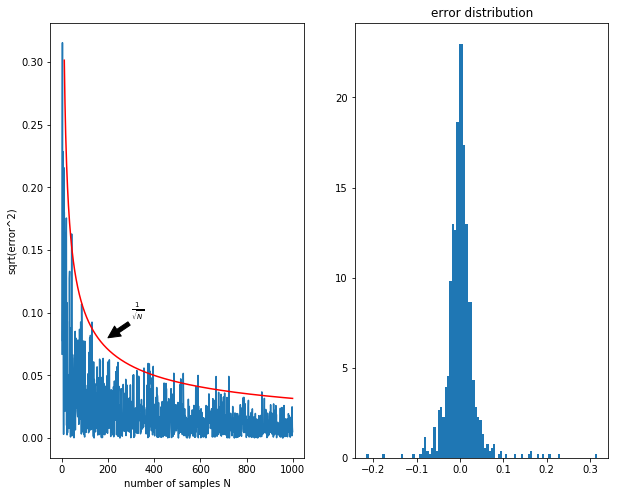

In [24]:
fig = plt.figure(figsize=(10,8))
ax = fig.subplots(nrows=1, ncols=2)
ax[0].plot(trials, errors_2);
ax[0].set_xlabel('number of samples N')
ax[0].set_ylabel('sqrt(error^2)');
ax[0].plot(trials[10:], 1/np.sqrt(trials[10:]), 'r')
# ax[0].annotate(r'$\frac{1}{\sqrt(N)}$', x=200, y= 0.08)
ax[0].annotate(r'$\frac{1}{\sqrt{N}}$', xy=(200,0.08), xytext=(300, 0.1),
            arrowprops=dict(facecolor='black', shrink=1),
            )

ax[1].hist(errors, bins=100, normed=True);
ax[1].set_title('error distribution');

This shows that the errors between exact computation and Monte Carlo integration depends on the number of $N$ as $1/\sqrt{N}$

## Errors in MC



11.81160952476162 0.004263259210641912


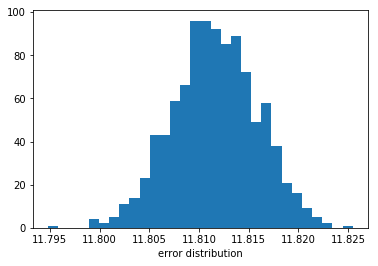

In [27]:
# multiple MC estimations
m=1000
N=10000
Imc=np.zeros(m)


for i in np.arange(m):
    
    X = np.random.uniform(low=a, high=b, size=N) # N values uniformly drawn from a to b 
    Y =f(X)   # CALCULATE THE f(x) 

    Imc[i]= (b-a) * np.sum(Y)/ N;
    
    
plt.hist(Imc, bins=30)
plt.xlabel("error distribution")
print(np.mean(Imc), np.std(Imc))


In [26]:
This looks like a Normal distribution.

0.01